# 卷积神经网络

## 项目：为小狗识别应用编写算法 

---

在此 notebook 中，我们已经为你提供一些模板代码，要成功完成此项目，你需要实现其他功能。除此之外，不需要修改所提供的代码。标题中以**（实现）**开头的部分表明你必须在下面的代码块中提供其他功能。我们会在每个部分提供说明，并在以“TODO”开头的代码块中提供实现细节。请仔细阅读说明。 

> **注意**：完成所有代码实现后，最后需要将 iPython Notebook 导出为 HTML 文档。在将 notebook 导出为 HTML 前，请运行所有代码单元格，使审阅者能够查看最终实现和输出结果。然后导出 notebook，方法是：使用顶部的菜单并依次转到**文件 -> 下载为 -> HTML (.html)**。提交内容应该同时包含此 notebook 和完成的文档。

除了实现代码之外，还需要回答与项目和代码实现相关的问题。请仔细阅读每个问题，并在**答案：**下方的文本框中填写答案。我们将根据每个问题的答案以及实现代码评估你提交的项目。

>**注意：**可以通过 **Shift + Enter** 键盘快捷键执行代码和标记单元格，并且可以通过双击单元格进入编辑模式，编辑标记单元格。

审阅标准还包含可选的“锦上添花”建议，可以指导你在满足最低要求的基础上改进项目。如果你打算采纳这些建议，则应该在此 Jupyter notebook 中添加代码。



---
### 为何要完成这道练习 

在此 notebook 中，你将开发一种可用于移动应用或网络应用的算法。最终你的代码将能够将任何用户提供的图像作为输入。如果从图像中检测出小狗，该算法将大致识别出小狗品种。如果检测出人脸，该算法将大致识别出最相似的小狗品种。下图显示了最终项目的潜在示例输出（但是我们希望每个学员的算法行为都不一样。）。 

![Sample Dog Output](images/sample_dog_output.png)

在此实际应用中，你需要将一系列模型整合到一起并执行不同的任务；例如，检测图中人脸的算法与推理小狗品种的 CNN 将不一样。有很多地方都可能会出错，没有什么完美的算法。即使你的答案不完美，也可以创造有趣的用户体验。

### 项目规划

我们将此 notebook 分成了几个独立的步骤。你可以通过以下链接浏览此 notebook。

* [第 0 步](#step0)：导入数据集
* [第 1 步](#step1)：检测人脸
* [第 2 步](#step2)：检测小狗
* [第 3 步](#step3)：（从头开始）创建分类小狗品种的 CNN
* [第 4 步](#step4)：（使用迁移学习）创建分类小狗品种的 CNN
* [第 5 步](#step5)：编写算法
* [第 6 步](#step6)：测试算法

---
<a id='step0'></a>
## 第 0 步：导入数据集

首先下载人脸和小狗数据集：

**注意：如果你使用的是 Udacity 工作区，你*不需要重新下载它们 - 它们可以在`/ data`文件夹中找到，如下面的单元格所示。**

* 下载[小狗数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip)。解压文件并将其放入此项目的主目录中，位置为 `/dog_images`。 

* 下载[人脸数据集](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip)。解压文件并将其放入此项目的主目录中，位置为 `/lfw`。  

*注意如果你使用的是 Windows 设备，建议使用 [7zip](http://www.7-zip.org/) 解压文件。*

在下面的代码单元格中将人脸 (LFW) 数据集和小狗数据集的文件路径保存到 NumPy 数组 `human_files` 和 `dog_files` 中。

In [56]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## 第 1 步：检测人脸

在此部分，我们使用 OpenCV 的[哈儿特征级联分类器](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html)检测图像中的人脸。  

OpenCV 提供了很多预训练的人脸检测器，它们以 XML 文件的形式存储在 [github](https://github.com/opencv/opencv/tree/master/data/haarcascades) 上。我们下载了其中一个检测器并存储在 `haarcascades` 目录中。在下个代码单元格中，我们将演示如何使用此检测器从样本图像中检测人脸。

Number of faces detected: 1


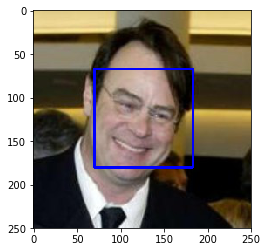

In [57]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

在使用任何人脸检测器之前，标准做法是将图像转换为灰阶图像。`detectMultiScale` 函数会执行存储在 `face_cascade` 中的分类器并将灰阶图像当做参数。  

在上述代码中，`faces` 是一个包含检测到的人脸的 numpy 数组，其中每行对应一张检测到的人脸。检测到的每张人脸都是一个一维数组，其中有四个条目，分别指定了检测到的人脸的边界框。数组中的前两个条目（在上述代码中提取为 `x` 和`y`）指定了左上角边界框的水平和垂直位置。数组中的后两个条目（提取为 `w` 和 `h`）指定了边界框的宽和高。

### 编写人脸检测器

我们可以编写一个函数，如果在图像中检测到人脸，该函数将返回 `True`，否则返回 `False`。此函数称为 `face_detector`，参数为图像的字符串文件路径，并出现在以下代码块中。

In [58]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### （实现）评估人脸检测器

__问题 1：__使用以下代码单元格测试 `face_detector` 函数的性能。  
- 对于 `human_files` 中的前100 张图像，有多少图像检测到了人脸？  
- 对于 `dog_files` 中的前100 张图像，有多少图像检测到了人脸？ 

理想情况下，我们希望所有人脸图像都能检测到人脸，所有小狗图像都不能检测到人脸。我们的算法不能满足此目标，但是依然达到了可接受的水平。我们针对每个数据集的前 100 张图像提取出文件路径，并将它们存储在 numpy 数组 `human_files_short` 和 `dog_files_short` 中。

__答案：__ 
- 对于 `human_files` 中的前100 张图像，有多少图像检测到了人脸？98
- 对于 `dog_files` 中的前100 张图像，有多少图像检测到了人脸？17

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def face_detector_loop(path_list):
    records = []
    for i in path_list:
        records.append(face_detector(i))
    return sum(records)

print(face_detector_loop(human_files_short))
print(face_detector_loop(dog_files_short))

98
17


建议在算法中使用 OpenCV 的人脸检测器来检测人脸图像，但是你也可以尝试其他方法，尤其是利用深度学习的方法:)。请在以下代码单元格中设计并测试你的人脸检测算法。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## 第 2 步：检测小狗

在此部分，我们使用[预训练的模型](http://pytorch.org/docs/master/torchvision/models.html)检测图像中的小狗。  

### 获取预训练的 VGG-16 模型

以下代码单元格会下载 VGG-16 模型以及在 [ImageNet](http://www.image-net.org/) 上训练过的权重，ImageNet 是一个非常热门的数据集，可以用于图像分类和其他视觉任务。ImageNet 包含 1000 万以上的 URL，每个都链接到包含某个对象的图像，这些对象分成了 [1000 个类别](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)。

In [54]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:24<00:00, 22217773.73it/s]


如果给定一张图像，此预训练的 VGG-16 模型能够针对图像中的对象返回预测结果（属于 ImageNet 中的 1000 个潜在类别之一）。

### （实现）使用预训练的模型做出预测

在下个代码单元格中，你将编写一个函数，它将图像路径（例如 `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`）当做输入，并返回预训练 VGG-16 模型预测的 ImageNet 类别对应的索引。输出应该始终是在 0 - 999（含）之间的整数。

在编写该函数之前，请阅读此 [PyTorch 文档](http://pytorch.org/docs/stable/torchvision/models.html)，了解如何针对预训练的模型预处理张量。

In [69]:
from PIL import Image
import torchvision.transforms as transforms
from torch.nn import functional as F

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    datatrans = transforms.Compose([transforms.RandomResizedCrop(224),
                                transforms.ToTensor()])
    
    img = datatrans(Image.open(img_path)).unsqueeze(0)
    img = img.cuda()
    VGG16.eval()
    output = VGG16(img)
    output = torch.functional.argmax(F.softmax(output))
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return int(output.tolist()) # predicted class index

### （实现）编写小狗检测器

查看该[字典](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)后，你将发现：小狗对应的类别按顺序排列，对应的键是 151-268（含），包含从 `'Chihuahua'` 到 `'Mexican hairless'` 的所有类别。因此，要检查预训练的 VGG-16 模型是否预测某个图像包含小狗，我们只需检查预训练模型预测的索引是否在 151 - 268（含）之间。

请根据这些信息完成下面的 `dog_detector` 函数，如果从图像中检测出小狗，它将返回 `True`（否则返回 `False`）。

In [70]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    if 151 <= index <= 268:
        judge = True
    else:
        judge = False
    
    return judge # true/false

### （实现）评估小狗检测器

__问题 2：__在以下代码单元格中测试 `dog_detector` 的效果。  
- 对于 `human_files_short` 中的图像，有多少图像检测到了小狗？  
- 对于 `dog_files_short` 中的图像，有多少图像检测到了小狗？

__答案：__
- 对于 `human_files_short` 中的图像，有多少图像检测到了小狗？1 
- 对于 `dog_files_short` 中的图像，有多少图像检测到了小狗？83

In [8]:
%%time
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.


from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def face_detector_loop(path_list):
    records = []
    for i in path_list:
        records.append(dog_detector(i))
    return sum(records)

print(face_detector_loop(human_files_short))
print(face_detector_loop(dog_files_short))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


1
83
CPU times: user 2min 22s, sys: 30.2 s, total: 2min 52s
Wall time: 2min 53s


建议在算法中使用 VGG-16 检测小狗图像，但是你也可以尝试其他预训练的网络（例如 [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3)、[ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3) 等）。请在以下代码单元格中测试其他预训练的 PyTorch 模型。如果你打算完成此_可选_任务，请报告 `human_files_short` 和 `dog_files_short` 的效果。

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## 第 3 步：（从头开始）创建分类小狗品种的 CNN

创建好从图像中检测人脸和小狗的函数后，我们需要预测图像中的小狗品种。在这一步，你需要创建一个分类小狗品种的 CNN。你必须从头创建一个 CNN（因此暂时不能使用迁移学习。），并且测试准确率必须至少达到 10%。在此 notebook 的第 4 步，你将使用迁移学习创建 CNN，并且能够获得很高的准确率。

预测图中小狗的品种是一项非常难的挑战。说实话，即使是我们人类，也很难区分布列塔尼猎犬和威尔斯激飞猎犬。  

布列塔尼猎犬 | 威尔斯激飞猎犬
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

还有很多其他相似的狗品种（例如卷毛寻回犬和美国水猎犬）。  

卷毛寻回犬 | 美国水猎犬
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


同理，拉布拉多有黄色、巧克力色和黑色品种。基于视觉的算法需要克服这种同一类别差异很大的问题，并决定如何将所有这些不同肤色的小狗分类为相同的品种。  

黄色拉布拉多 | 巧克力色拉布拉多 | 黑色拉布拉多
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

随机猜测的效果很差：除了类别数量不太平衡之外，随机猜测的正确概率约为 1/133，准确率不到 1%。  

在深度学习领域，实践比理论知识靠谱得到。请尝试多种不同的架构，并相信你的直觉。希望你可以从学习中获得乐趣！

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dog_images/train`、`dog_images/valid` 和 `dog_images/test` 下）。[此自定义数据集文档](http://pytorch.org/docs/stable/torchvision/datasets.html)或许对你有帮助。如果你想增强训练和/或验证数据，请参阅各种[转换方法](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)！

In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms
import glob
import os 

from PIL import Image
from PIL import ImageFile
import torchvision.transforms as transforms
from torch.nn import functional as F
ImageFile.LOAD_TRUNCATED_IMAGES = True

class GetLoader():
    def __init__(self):
        self._root_path = '/data/dog_images'
        self._batch = 3
        self._size = 224
    
    @property
    def batch(self):
        return self._batch
    
    @batch.setter
    def batch(self, x):
        self._batch = x
        
    def _imagegetter(self, subpath, transf):
        p = os.path.join(self._root_path, subpath)
        return torchvision.datasets.ImageFolder(root = p, transform=transf)
    
    def _loader(self, data):
        return torch.utils.data.DataLoader(data, batch_size = self._batch, shuffle = True)
    
    def train(self, transf):
        d = self._imagegetter('train', transf)
        return self._loader(d)
    
    def test(self, transf):
        d = self._imagegetter('test', transf)
        return self._loader(d)
    
    def valid(self, transf):
        d = self._imagegetter('valid', transf)
        return self._loader(d)

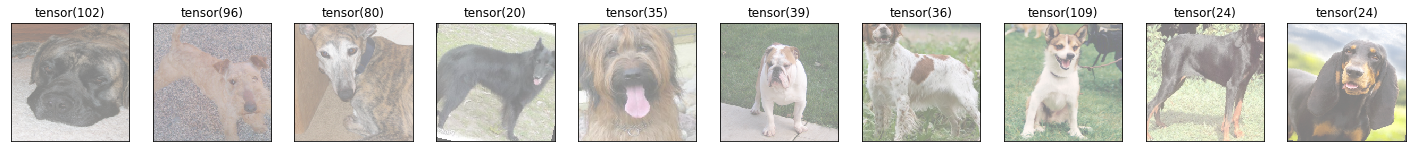

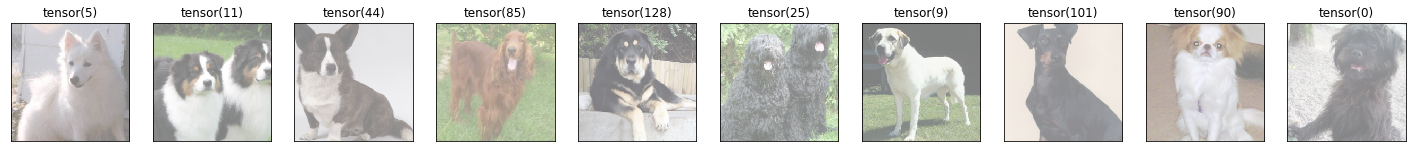

In [4]:
size = 224
training = [transforms.RandomResizedCrop(256, scale=(0.8,1.0)),
         transforms.RandomRotation(15),
         transforms.ColorJitter(),
         transforms.RandomHorizontalFlip(),
         transforms.CenterCrop(size),
         transforms.ToTensor(),
         transforms.Normalize([0,0,0], [ 1,1,1])]
#          transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])]
validating = [transforms.Resize(size=256),
                transforms.CenterCrop(size=224),
                transforms.ToTensor(),
                transforms.Normalize([0,0,0], [ 1,1,1])]
#                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]

training = transforms.Compose(training)
validating = transforms.Compose(validating)

from matplotlib import pyplot as plt
import numpy as np

get = GetLoader()
get.batch = 10
a = iter(get.train(training))

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0))) 

img, lab = a.next()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
    imshow(img.cpu()[idx])
    ax.set_title(lab[idx])
    
    
a = iter(get.valid(validating))

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0))) 

img, lab = a.next()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
    imshow(img.cpu()[idx])
    ax.set_title(lab[idx])
    
del a

**问题 3：**描述你所选的数据预处理流程。 
- 你是如何调整图像大小的（裁剪、拉伸等）？你选择的输入张量大小是多少，为何？
- 你是否决定增强数据集？如果是，如何增强（平移、翻转、旋转等）？如果否，理由是？


**答案**：
对于图像处理我做过几轮尝试，前几轮只关注在把图片剪切成可以输入的大小，但是在模型拟合的过程中一直不见loss的下降，最后图片处理优化如下:<br>
transforms.RandomResizedCrop(256, scale=(0.8,1.0))先把图片随机剪切成较输入数据大一点的方形，缩放比例为0.8-1<br>
transforms.RandomRotation(15)给与图片+-15度的倾斜算是arugmentation的一部分<br>
transforms.ColorJitter()调整亮度对比度饱和度<br>
transforms.RandomHorizontalFlip()对图片做随机镜像，argumentation的一部分<br>
transforms.CenterCrop(size)因为图片先被resize成稍大的正方形，从中间剪切出input的大小<br>
transforms.ToTensor()图片toTensor<br>
整体实践下来这样会把图片保留较好辨识的一部分，之前的错误经验是如果人都不能很好的分辨，盲目试图去拟合模型也不会有什么好效果。

### （实现）模型架构

创建分类小狗品种的 CNN。使用以下代码单元格中的模板。

In [2]:
# Model 4

import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture

class ResN(nn.Module):
    def __init__(self):
        super(ResN, self).__init__()
        
        # 224
        self.conv1 = nn.Conv2d(3,64,2,2,0)
        # 112
        
        # res1
        self.res11 = nn.Conv2d(64,64,3,1,1)
        self.res12 = nn.Conv2d(64,64,3,1,1)
        
        #112
        self.conv2 = nn.Conv2d(64,128,2,2,0)
        # 64
        
        # res 2
        self.res21 = nn.Conv2d(128,128,3,1,1)
        self.res22 = nn.Conv2d(128,128,3,1,1)
        
        # 64
        self.conv3 = nn.Conv2d(128,256,2,2,0)
        # 32
        
        # bot1
        self.res31 = nn.Conv2d(256,64,1,1,0)
        self.res32 = nn.Conv2d(64,64,3,1,1)
        self.res33 = nn.Conv2d(64,256,1,1,0)
        
        # 32
        self.conv4 = nn.Conv2d(256,256,2,2,0)
        # 16
        
        # bot2
        self.res41 = nn.Conv2d(256,64,1,1,0)
        self.res42 = nn.Conv2d(64,64,3,1,1)
        self.res43 = nn.Conv2d(64,256,1,1,0)
        
        # 16
        self.conv5 = nn.Conv2d(256,512,2,2,0)
        # 8
        
        self.bn64 = nn.BatchNorm2d(64)
        self.bn128 = nn.BatchNorm2d(128)
        self.bn256 = nn.BatchNorm2d(256)
        self.bn512 = nn.BatchNorm2d(512)
        
        self.fc1 = nn.Linear(512*7*7,1000)
        
        self.out = nn.Linear(1000,133)
        
        self.relu = nn.ReLU(True)
        
    def forward(self,x):
        x = self.relu(self.bn64(self.conv1(x)))
        
        residual = x
        x = self.relu(self.bn64(self.res11(x)))
        x = self.bn64(self.res12(x))
        x += residual
        x = self.relu(x)
        
        x = self.relu(self.bn128(self.conv2(x)))
        
        residual = x
        x = self.relu(self.bn128(self.res21(x)))
        x = self.bn128(self.res22(x))
        x += residual
        x = self.relu(x)
        
        x = self.relu(self.bn256(self.conv3(x)))
        
        residual = x
        x = self.relu(self.bn64(self.res31(x)))
        x = self.relu(self.bn64(self.res32(x)))
        x = self.bn256(self.res33(x))
        x += residual
        x = self.relu(x)
        
        x = self.relu(self.bn256(self.conv4(x)))
        
        residual = x
        x = self.relu(self.bn64(self.res41(x)))
        x = self.relu(self.bn64(self.res42(x)))
        x = self.bn256(self.res43(x))
        x += residual
        x = self.relu(x)
        
        x = self.relu(self.bn512(self.conv5(x)))
        
        x = x.view(-1,512*7*7)
        x = self.relu(self.fc1(x))
        x = self.out(x)
        
        return x

# instantiate the CNN
model_scratch = ResN()

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()
    
model_scratch

ResN(
  (conv1): Conv2d(3, 64, kernel_size=(2, 2), stride=(2, 2))
  (res11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
  (res21): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res22): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
  (res31): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
  (res32): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res33): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(2, 2), stride=(2, 2))
  (res41): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
  (res42): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (res43): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
  (conv5): Conv2d(256, 512, kern

In [2]:
# Model 4

import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        
        # size: 224*224->224*224, filter:3->16
        self.conv1 = nn.Conv2d(3,16,3,1,1)
        self.bn1 = nn.BatchNorm2d(16)
        # size: 224*224->112*112, filter:16->16      
        self.us1 = nn.Conv2d(16,16,3,2,1)
        self.bn11 = nn.BatchNorm2d(16)
        # size: 112*112->112*112, filter:16->32        
        self.conv2 = nn.Conv2d(16,32,3,1,1)
        self.bn2 = nn.BatchNorm2d(32)
        # size: 112*112->64*64, filter:32->32        
        self.us2 = nn.Conv2d(32,32,3,2,1)
        self.bn22 = nn.BatchNorm2d(32)
        # size: 56*56->56*56, filter:32->64        
        self.conv3 = nn.Conv2d(32,64,3,1,1)
        self.bn3 = nn.BatchNorm2d(64)
        # size: 56*56->28*28, filter:64->64        
        self.us3 = nn.Conv2d(64,64,3,2,1)
        self.bn33 = nn.BatchNorm2d(64)
        # size: 28*28->28*28, filter:64->128       
        self.conv4 = nn.Conv2d(64,128,3,1,1)
        self.bn4 = nn.BatchNorm2d(128)
        # size: 28*28->14*14, filter:128->128       
        self.us4 = nn.Conv2d(128,128,3,2,1)
        self.bn44 = nn.BatchNorm2d(128)
        # size: 14*14->14*14, filter:128->256        
        self.conv5 = nn.Conv2d(128,256,3,1,1)
        self.bn5 = nn.BatchNorm2d(256)
        # size: 14*14->7*7, filter:256->256       
        self.us5 = nn.Conv2d(256,256,3,2,1)
        self.bn55 = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(7*7*256, 1000)
        self.out = nn.Linear(1000,133)
        
        self.bnfc = nn.BatchNorm1d(1000)
        self.relu = nn.ReLU()

        
    def forward(self,x):
        
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn11(self.us1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.relu(self.bn22(self.us2(x)))
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn33(self.us3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.relu(self.bn44(self.us4(x)))
        x = self.relu(self.bn5(self.conv5(x)))
        x = self.relu(self.bn55(self.us5(x)))
        
        x = x.view(-1, 7*7*256)
        x = self.relu(self.bnfc(self.fc1(x)))
        x = self.out(x)
        
        return x

# instantiate the CNN
model_scratch = SimpleNet()

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()
    
model_scratch

SimpleNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (us1): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn11): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (us2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn22): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (us3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn33): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

__问题 4：__列出获得最终 CNN 结构的步骤以及每步的推理过程。  

__答案：__ <br>
  模型的设计如下，有五层卷积，后有链接两层全连接层。每层卷积之后会通过下采样减少图像大小，使用3*3大小filter，padding为1，每次下采样可以使得图像大小变为1/2,共有5次下采样，全连接层之前的图像为7*7*256的大小。每一层会采用BatchNormalization的方式对输出进行归一化：使用BatchNorm可以解决Internal Variate Shift 的问题，同时提高学习的效率。所谓Internal Variate Shift即在每个minibatch的layer上input的数据都有不同的distribution，这无疑增加的学习的难度，过往会通过小心调整初始化参数和白化来克服，有了BN之后这些问题都得到了一定的克服！BN即为在每个minibatch的layer进入activation function之前都对数据进行归一化处理，但同时引入gamma缩放因子和beta平移因子，使得不会每次数据都会被归一化到均值为0std为1的正太分布（否则什么也学不到），使得归一化的同时还保留了特征信息，提高了学习效率。<br>
  BatchNorm之后的激活函数都为ReLu,除了最后的输出。最后输出计算loss时用到cross_entropy(log(softmax))，即nn.CrossEntropyLoss()。优化器为SGD。
  
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (us1): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))<br>
  (bn11): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (us2): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))<br>
  (bn22): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (us3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))<br>
  (bn33): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (us4): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))<br>
  (bn44): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))<br>
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (us5): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))<br>
  (bn55): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (fc1): Linear(in_features=12544, out_features=1000, bias=True)<br>
  (out): Linear(in_features=1000, out_features=133, bias=True)<br>
  (bnfc): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)<br>
  (relu): ReLU()<br>

In [3]:
import torch.optim as optim
import torch.nn as nn
import sys

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.1, momentum=0.7, weight_decay=0.001)

### （实现）训练和验证模型

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_scratch.pt'`。

In [4]:
size = 224
batch = 50

import numpy as np

# data loader
training = [transforms.RandomResizedCrop(256, scale=(0.8,1.0)),
         transforms.RandomRotation(15),
         transforms.ColorJitter(),
         transforms.RandomHorizontalFlip(),
         transforms.CenterCrop(size),
         transforms.ToTensor(),
           transforms.Normalize([0,0,0],[1,1,1])]
#          transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])]
validating = [transforms.Resize(size=256),
                transforms.CenterCrop(size=224),
                transforms.ToTensor(),
            transforms.Normalize([0,0,0],[1,1,1])]

training = transforms.Compose(training)
validating = transforms.Compose(validating)

g = GetLoader()
g.batch = batch

loaders_scratch = {'train':g.train(training),
                  'test':g.test(validating),
                  'valid':g.valid(validating)}


    
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        total_len = loaders['train'].__len__()
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
            sys.stdout.write('\r[{:2.2%}] Training Loss: {:5.5}'.format(batch_idx / total_len, train_loss))
            sys.stdout.flush()

                #data, target = data.cpu(), target.cpu()
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                output = model(data)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))

            
        # print training/validation statistics 
        
        print('\nEpoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model



In [5]:
# using model 4

model_scratch.load_state_dict(torch.load('model_scratch_simple.pt'))

model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch_simple.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch_simple.pt'))

[99.25%] Training Loss: 3.3709
Epoch: 1 	Training Loss: 3.370873 	Validation Loss: 3.787340
Validation loss decreased (inf --> 3.787340).  Saving model ...
[99.25%] Training Loss: 3.1248
Epoch: 2 	Training Loss: 3.124836 	Validation Loss: 3.718570
Validation loss decreased (3.787340 --> 3.718570).  Saving model ...
[99.25%] Training Loss: 2.9135
Epoch: 3 	Training Loss: 2.913478 	Validation Loss: 2.639934
Validation loss decreased (3.718570 --> 2.639934).  Saving model ...
[99.25%] Training Loss: 2.7251
Epoch: 4 	Training Loss: 2.725062 	Validation Loss: 3.110129
[99.25%] Training Loss: 2.4794
Epoch: 5 	Training Loss: 2.479354 	Validation Loss: 3.076667
[99.25%] Training Loss: 2.2752
Epoch: 6 	Training Loss: 2.275182 	Validation Loss: 2.145134
Validation loss decreased (2.639934 --> 2.145134).  Saving model ...
[99.25%] Training Loss: 2.0553
Epoch: 7 	Training Loss: 2.055269 	Validation Loss: 2.391288
[99.25%] Training Loss: 1.8648
Epoch: 8 	Training Loss: 1.864830 	Validation Loss: 2.

KeyboardInterrupt: 

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 10%。

In [6]:
model_scratch.load_state_dict(torch.load('model_scratch_simple.pt'))

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.901615


Test Accuracy: 25% (211/836)


---
<a id='step4'></a>
## 第 4 步：（使用迁移学习）创建分类小狗品种的 CNN

现在你将使用迁移学习创建能够识别图中小狗品种的 CNN。你的 CNN 必须在测试集上至少达到 60% 的准确率。

### （实现）为小狗数据集指定数据加载器

在以下代码单元格中编写三个独立的[数据加载器](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)，用于训练、验证和测试小狗图像数据集（分别位于 `dogImages/train`、`dogImages/valid` 和 `dogImages/test` 下）。 

**你也可以使用在从头开始创建 CNN 这一步时创建的同一数据加载器**。

In [2]:
## TODO: Specify data loaders

import torch 
import torchvision
import torchvision.transforms as transforms
import glob
import os 

from PIL import Image
from PIL import ImageFile
import torchvision.transforms as transforms
from torch.nn import functional as F
ImageFile.LOAD_TRUNCATED_IMAGES = True

class GetLoader():
    def __init__(self):
        self._root_path = '/data/dog_images'
        self._batch = 3
        self._size = 224
    
    @property
    def batch(self):
        return self._batch
    
    @batch.setter
    def batch(self, x):
        self._batch = x
        
    def _imagegetter(self, subpath, transf):
        p = os.path.join(self._root_path, subpath)
        return torchvision.datasets.ImageFolder(root = p, transform=transf)
    
    def _loader(self, data):
        return torch.utils.data.DataLoader(data, batch_size = self._batch, shuffle = True)
    
    def train(self, transf):
        d = self._imagegetter('train', transf)
        return self._loader(d)
    
    def test(self, transf):
        d = self._imagegetter('test', transf)
        return self._loader(d)
    
    def valid(self, transf):
        d = self._imagegetter('valid', transf)
        return self._loader(d)


In [3]:
size = 224
training = [transforms.RandomResizedCrop(256, scale=(0.8,1.0)),
         transforms.RandomRotation(15),
         transforms.ColorJitter(),
         transforms.RandomHorizontalFlip(),
         transforms.CenterCrop(size),
         transforms.ToTensor(),
         transforms.Normalize([0,0,0],
                             [1,1,1])]
#          transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])]
validating = [transforms.Resize(size=256),
                transforms.CenterCrop(size=224),
                transforms.ToTensor(),
                       transforms.Normalize([0,0,0],
                             [1,1,1])]
#                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]

training = transforms.Compose(training)
validating = transforms.Compose(validating)

from matplotlib import pyplot as plt
import numpy as np

get = GetLoader()
get.batch = 10
a = iter(get.train(training))

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0))) 

img, lab = a.next()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
    imshow(img.cpu()[idx])
    ax.set_title(lab[idx])
    
    
a = iter(get.valid(validating))

def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1, 2, 0))) 

img, lab = a.next()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[])
    imshow(img.cpu()[idx])
    ax.set_title(lab[idx])
    
del a

### （实现）模型架构

使用迁移学习创建分类小狗品种的 CNN。在以下代码单元格中填写代码并将初始化的模型另存为变量 `model_transfer`。

In [5]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model = models.vgg19(pretrained=True)
for param in model.parameters():
    param.requre_grad = False
    
model.classifier[6] = nn.Linear(4096,133)

# for param in model.classifier.parameters():
#     param.requre_grad = True
    
model_transfer = model

use_cuda = True
if use_cuda:
    model_transfer = model_transfer.cuda()
    
# print(model)
# for param in model.parameters():
#     print(param.requre_grad)

__问题 5：__列出获得最终 CNN 结构的步骤以及每步的推理过程。解释为何该结构适合解决手头的问题。

__答案：__ 
迁移学习的思路是用已有的网络参数来解决现有问题。cnn中的conv层是特别好的特征提取器，从浅层的线条颜色到深层的一些复杂特征都可以学习到，vgg19是通过在图片学习1000种东西的分类，理论上已经具备了非常多feature的提取能力。虽然在分类内容上和我们今天的课题略有差异，但是其浅层和深层网络的特征是可以被利用起来的，本例只改造了classifier最后一层的fc，有输出1000改为输出133。在训练中也只训练这一层的weights。经过一轮epoch就得到了较好的效果。


### （实现）指定损失函数和优化器

在下个代码单元格中指定[损失函数](http://pytorch.org/docs/master/nn.html#loss-functions)和[优化器](http://pytorch.org/docs/master/optim.html)。在下面将所选的损失函数另存为 `criterion_transfer`，并将优化器另存为 `optimizer_transfer`。

In [6]:
from torch import optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model.classifier[6].parameters(), lr = 0.01, momentum=0.7, weight_decay=0.001)

### （实现）训练和验证模型。

在以下代码单元格中训练和验证模型。[将最终模型参数](http://pytorch.org/docs/master/notes/serialization.html)保存到以下文件路径：`'model_transfer.pt'`。

In [12]:
import sys
import numpy as np

# train the model
n_epochs = 100
size = 224
batch = 10
model_transfer = model

# data loader
training = [transforms.RandomResizedCrop(256, scale=(0.8,1.0)),
         transforms.RandomRotation(15),
         transforms.ColorJitter(),
         transforms.RandomHorizontalFlip(),
         transforms.CenterCrop(size),
         transforms.ToTensor()]
#          transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])]
validating = [transforms.Resize(size=256),
                transforms.CenterCrop(size=224),
                transforms.ToTensor()]

training = transforms.Compose(training)
validating = transforms.Compose(validating)

g = GetLoader()
g.batch = batch

loaders_transfer = {'train':g.train(training),
                  'test':g.test(validating),
                  'valid':g.valid(validating)}

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        total_len = loaders['train'].__len__()
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
            sys.stdout.write('\r[{:2.2%}] Training Loss: {:5.5}'.format(batch_idx / total_len, train_loss))
            sys.stdout.flush()

                #data, target = data.cpu(), target.cpu()
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                output = model(data)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))

            
        # print training/validation statistics 
        
        print('\nEpoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

[98.51%] Training Loss: 1.2027
Epoch: 1 	Training Loss: 1.202661 	Validation Loss: 0.952211
Validation loss decreased (inf --> 0.952211).  Saving model ...
[19.40%] Training Loss: 1.0977

KeyboardInterrupt: 

### （实现）测试模型

在小狗图像测试数据集上尝试模型。在以下代码单元格中计算并输出测试损失和准确率。确保测试准确率高于 60%。

In [8]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.983210


Test Accuracy: 72% (606/836)


### （实现）使用模型预测小狗品种

编写一个函数，它会将图像路径作为输入，并返回模型预测的小狗品种（`Affenpinscher`、`Afghan hound` 等）。

In [48]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model = models.vgg19(pretrained=False)
    for param in model.parameters():
        param.requre_grad = False
    model.classifier[6] = nn.Linear(4096,133)
    model_transfer = model
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    loader = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])
    
    """load image, returns cuda tensor"""
    image = Image.open(img_path)
    image = loader(image).float()
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    image.cuda()
    index = model_transfer(image)
    return class_names[torch.argmax(index).tolist()]

In [53]:
predict_breed_transfer('images/Welsh_springer_spaniel_08203.jpg')

'Welsh springer spaniel'

---
<a id='step5'></a>
## 第 5 步：编写算法

编写一个算法，它会将图像的文件路径作为输入，并首先判断图像中是否包含人脸、小狗，或二者都不含。然后，
- 如果在图像中检测到了__小狗__，则返回预测的品种。
- 如果在图像中检测到了__人脸__，则返回相似的小狗品种。
- 如果二者都没检测到，则输出错误消息。

你可以自己编写从图像中检测人脸和小狗的函数，当然也可以使用上面开发的 `face_detector` 和 `human_detector` 函数。你必须使用在第 4 步创建的 CNN 预测小狗品种。  

下面提供了一些示例算法输出，但是你也可以自己设计用户体验。

![Sample Human Output](images/sample_human_output.png)


### （实现）编写算法

In [73]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

from matplotlib import pyplot as plt
import numpy as np
import matplotlib.image as mpimg

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img=mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    dog = dog_detector(img_path)
    face = face_detector(img_path)
    if dog:
        print('dog detected!')
        cls = predict_breed_transfer(img_path)
        print("It's a {}".format(cls))
        
    elif face:
        print('human detected!')
        cls = predict_breed_transfer(img_path)
        print("You looks like a {}".format(cls))
        

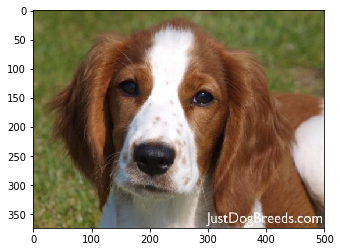

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


dog detected!
It's a Irish red and white setter


In [74]:
run_app('images/Welsh_springer_spaniel_08203.jpg')

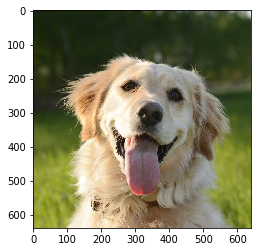

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


dog detected!
It's a Great pyrenees


In [75]:
run_app('test/dog1.jpg')

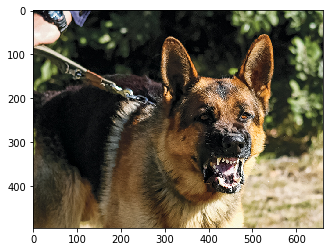

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


dog detected!
It's a German shepherd dog


In [76]:
run_app('test/dog2.jpg')

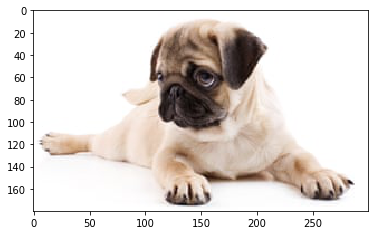

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


dog detected!
It's a Mastiff


In [78]:
run_app('test/dog3.jpg')

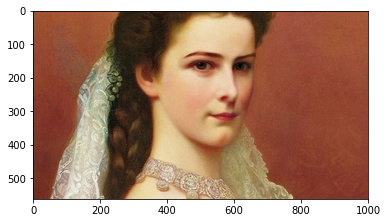

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


human detected!
You looks like a Bull terrier


In [79]:
run_app('test/draw.jpg')

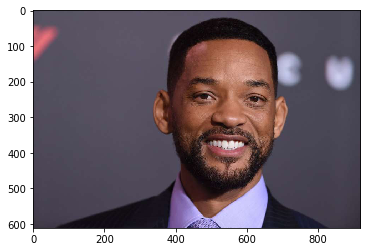

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


human detected!
You looks like a Dogue de bordeaux


In [80]:
run_app('test/wills.jpg')

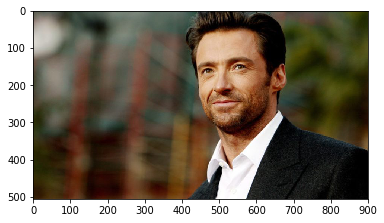

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


human detected!
You looks like a Smooth fox terrier


In [81]:
run_app('test/wolf.jpg')

---
<a id='step6'></a>
## 第 6 步：测试算法

在此部分测试新算法啦。算法认为看起来像哪种小狗？如果你有一只狗，算法能准确预测出小狗的品种吗？如果你有一只猫，算法会错误地认为这只猫是小狗吗？

### （实现）在样本图像上测试算法。

至少在计算机上用 6 张图像测试你的算法。你可以使用任何图像。至少测试两张人脸图像和两张小狗图像。  

__问题 6：__结果比你预期的要好吗 :)?还是更糟糕 :(？请对你的算法提出至少三个值得改进的地方。

__答案：__（三个值得改进的地方）


```python
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

三个改进的地方:
1）对于较小图片不能成功load，考虑对图填充增大size
2）三个狗子图片只猜对了一个，考虑使用resnet做transfer learning，并最最后classifier层重置参数重新学习，fine tune模型
3）目前app无法对多人物或多狗子预测，希望继续学习能学到object detection的内容，丰富功能

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
```